In [14]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json


%matplotlib inline 

In [15]:
# Load .env enviroment variables
load_dotenv() 

True

In [16]:
# Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3

In [17]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"  
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD" 

In [18]:
# Fetch current BTC price
fetch_btc_price = requests.get(btc_url) 

# Fetch current ETH price
fetch_eth_price = requests.get(eth_url)

# Compute current value of my crpto
current_eth_price_json = json.loads(fetch_eth_price.content)
current_btc_price_json = json.loads(fetch_btc_price.content)

current_eth_price = current_eth_price_json['data']['1027']['quotes']['USD']['price']
current_btc_price = current_btc_price_json['data']['1']['quotes']['USD']['price']

my_eth_value = current_eth_price * my_eth
my_btc_value = current_btc_price * my_btc

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}") 

# Get crypto total
total_crypto = my_eth_value  +  my_btc_value

The current value of your 1.2 BTC is $59552.40
The current value of your 5.3 ETH is $11586.59


## Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [19]:
# Current amount of shares
my_spy_shares = 50
my_agg_shares = 200

In [20]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY") 

In [21]:
 # Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2") 

In [22]:
 # Format current date as ISO format  
today = pd.Timestamp("2021-04-23", tz="America/New_York").isoformat() 


In [23]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]


# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# preview dataframe
display(df_closing_prices.head())


# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}") 



,AGG,SPY
2021-04-23,114.75,416.72


Current AGG closing price: $114.75
Current SPY closing price: $416.72


In [24]:
# Compute the current value of shares
my_spy_value = my_spy_shares * spy_close_price
my_agg_value = my_agg_shares * agg_close_price


# Print current The current value of both shares
print(f"The current value of your {my_agg_shares} AGG shares is ${my_agg_value:0.2f}") 
print (f"The current value of your {my_spy_shares} SPY shares is ${my_spy_value:0.2f}")

# Get shares total
total_shares = my_spy_value + my_agg_value

print(total_shares)


The current value of your 200 AGG shares is $22950.00
The current value of your 50 SPY shares is $20836.00
43786.0


## Savings Health Analysis

In [25]:
# Set monthly household income
monthly_income = 12000
savings = {"Amount":[total_crypto,total_shares]}


# Create savings DataFrame
df_savings = pd.DataFrame(savings, index=["crypto","shares"])

# Display savings DataFrame
display(df_savings) 

,Amount
crypto,71138.995
shares,43786.000


<AxesSubplot:ylabel='Amount'>

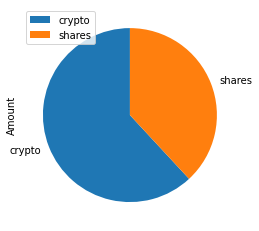

In [26]:
# Plot savings pie chart
df_savings.plot(kind='pie',y="Amount",startangle=90)

In [27]:
 # Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if  total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Hooray, you reachgd your financial goals")  
else :
    dollars_left_to_reach_goal =  emergency_fund - total_savings
    print(f"You need ${dollars_left_to_reach_goal} to reach your goal")

Congratulations! You have enough money in your emergency fund


 
   ## Monte Carlo Simulation


In [28]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-04-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-23', tz='America/New_York').isoformat() 

In [29]:
# Set timeframe to '1D'
timeframe = "1D"

# Set the ticker information
tickers = ["SPY","AGG"]

 # Get 5 years' worth of historical data for SPY and AGG
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.head() 

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2017-05-04 00:00:00-04:00  108.55  108.70  108.55  108.665  1789624  238.83   
2017-05-05 00:00:00-04:00  108.72  108.74  108.57  108.720  1287794  239.18   
2017-05-08 00:00:00-04:00  108.63  108.67  108.49  108.495  1579134  239.76   
2017-05-09 00:00:00-04:00  108.43  108.51  108.40  108.495  2395343  239.96   
2017-05-10 00:00:00-04:00  108.60  108.66  108.44  108.520  1427511  239.38   

                                                               
                               high     low   close    volume  
time                                                           
2017-05-04 00:00:00-04:00  238.9225  237.78  238.75  46170233  
2017-05-05 00:00:00-04:00  239.7200  238.68  239.72  43733544  
2017-05-08 00:00:00-04:00  239.9200  239.17  239.67  32087919  
2017-05-09 00:00:00-04:00  240.1900  239.04  239.46  39723891  
2017-05-10 00:00:00-04:00  239.8700  239.15  239.85  34222778

In [30]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns starting with one year 
MC_oneyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 100,
    num_trading_days = 252
) 


MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
) 

# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return() 



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993417,0.992036,0.994614,0.994260,1.006878,0.987856,0.997359,1.002963,1.003819,0.995149,...,0.998167,1.007488,1.003968,1.018457,0.991356,0.999148,1.004521,0.999053,0.995842,0.991883
2,0.990259,1.007642,1.000895,1.012265,1.017421,0.994160,1.011017,1.003807,1.000664,0.996273,...,0.983016,1.002721,0.994797,1.019768,0.993414,0.999635,1.028715,0.999931,0.999771,0.984640
3,0.980155,1.028767,1.000253,1.017082,1.019581,0.998675,0.999217,1.009079,0.995389,1.012630,...,0.989448,1.009127,1.005633,1.019712,1.013544,1.007319,1.027748,0.997669,0.998270,0.987399
4,0.990017,1.037734,0.999865,1.002810,1.025906,0.987573,0.997502,1.004978,0.996553,1.021412,...,0.982602,1.000466,1.000844,1.019735,1.003272,0.999311,1.021694,1.003793,0.993073,0.987721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.733240,5.681997,22.157125,16.295596,9.404268,12.108421,11.447554,4.117376,19.914833,11.768970,...,16.220797,9.243988,19.361744,41.135318,50.274379,15.785577,19.502466,31.253693,8.937315,20.642330
7557,7.632774,5.604591,22.163814,16.432293,9.281030,12.211343,11.427475,4.113743,20.028316,11.799727,...,16.419787,9.334185,19.334241,41.013104,49.558745,15.625788,19.362013,31.517878,8.925992,20.497528
7558,7.633301,5.559021,22.421198,16.518849,9.375491,12.230967,11.456235,4.145927,19.940590,11.731552,...,16.477687,9.377927,19.328901,40.902607,48.956429,15.536743,19.190299,30.974867,8.916114,20.521740
7559,7.669462,5.626538,22.348545,16.548666,9.452444,12.123227,11.379631,4.083834,20.103652,11.562442,...,16.609813,9.340977,19.492584,40.578512,49.312425,15.562436,19.437839,31.002158,8.948179,20.335721


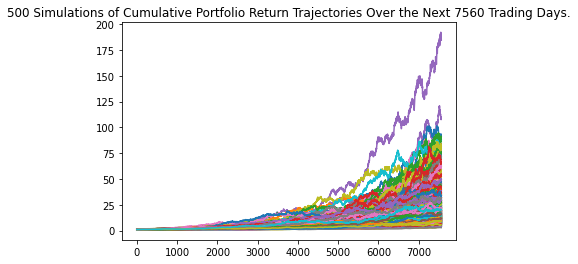

In [31]:
 # Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

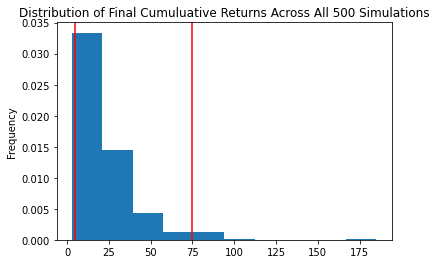

In [33]:
 # Plot simulation outcomes
line_plot = MC_thirtyyear.plot_distribution()

 ## Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl) 

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}") 

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}") 